# A tutorial on Pandas

While I find the `tidyverse` extremely expressive and unique, there is a lot of effort that has gone into making `Pandas` an indispensable tool for data analysis. In this workbook, we look at a quick overview of pandas and then translate the examples from the `dplyr` workbooks. This is a self-didactic attempt to learn [Modern Pandas](https://tomaugspurger.github.io/modern-1-intro.html).

In [ ]:
import os
import zipfile

import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep

In [78]:
%matplotlib inline
from plotnine import *

In [ ]:
flights = pd.read_csv("flights.csv")

A `glimpse` into the data

In [22]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 20 columns):
Unnamed: 0        336776 non-null int64
year              336776 non-null int64
month             336776 non-null int64
day               336776 non-null int64
dep_time          328521 non-null float64
sched_dep_time    336776 non-null int64
dep_delay         328521 non-null float64
arr_time          328063 non-null float64
sched_arr_time    336776 non-null int64
arr_delay         327346 non-null float64
carrier           336776 non-null object
flight            336776 non-null int64
tailnum           334264 non-null object
origin            336776 non-null object
dest              336776 non-null object
air_time          327346 non-null float64
distance          336776 non-null int64
hour              336776 non-null int64
minute            336776 non-null int64
time_hour         336776 non-null object
dtypes: float64(5), int64(10), object(5)
memory usage: 51.4+ MB


The `%>%` operator is the equivalent to the method chains that are prevalent in pandas. More on this after the indexing examples.

In [ ]:
flights.groupby('carrier').first()

Element access using indexes are separated into `.loc` (location based indexing) and `.iloc` (positional indexing).

In [ ]:
flights.groupby('carrier').first().loc[['AA', 'AS', 'DL'], ['day', 'tailnum']]

In [ ]:
flights.groupby('carrier').first().iloc[[0, 1, 3], [0, 1]]

Conditional indexing and updation of columns happpens rather frequently. In the below example, set the rows of `b` to `b/10` when `a <= 3`.

In [ ]:
f = pd.DataFrame({'a': [1, 2, 3, 4, 5],
                  'b': [10, 20, 30, 40, 50]})

f.loc[f['a'] <= 3, 'b'] = f.loc[f['a'] <= 3, 'b']/10
f

Another common `dplyr` operation is `mutate`, which is replaced in this world by `assign`.

In [30]:
f.assign(c = f['a'] + f['b'], 
         d = f['a'] * f['b'])

,a,b,c,d
0,1,1.0,2.0,1.0
1,2,2.0,4.0,4.0
2,3,3.0,6.0,9.0
3,4,40.0,44.0,160.0
4,5,50.0,55.0,250.0


Let us replicate examples from the `dplyr` workbooks now. [This](https://pandas.pydata.org/pandas-docs/stable/comparison_with_r.html) is a good place to look up the correspondence between `dplyr` and `pandas`.

In [25]:
# Find all flights that departed in 1st January

flights.query('month == 1 & day == 1').head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [29]:
# Select a subset of the data excluding year, month and day

flights.drop(['year', 'month', 'day'], axis = 1).head()

,Unnamed: 0,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [57]:
# Compute the increase in flight time because of the delays?

# Method chaining doesnt work as elegantly as mutate

flights['gain'] = flights['arr_delay'] - flights['dep_delay']
flights['gain_per_hour'] = flights['gain']/(flights['air_time']/60)

flights.loc[:, ['gain', 'gain_per_hour']].head()

,gain,gain_per_hour
0,9.0,2.378855
1,16.0,4.229075
2,31.0,11.625000
3,-17.0,-5.573770
4,-19.0,-9.827586


In [58]:
# Each flight has a unique tail number. Generate a summary of the
# data by each plane, number of flights it took, average distance traveled,
# average arrival delay.

delay = flights.groupby('tailnum') \
               .agg({'tailnum': 'count',
                     'distance': 'mean',
                     'arr_delay': 'mean'}) \
               .query('tailnum > 20 & distance < 2000')

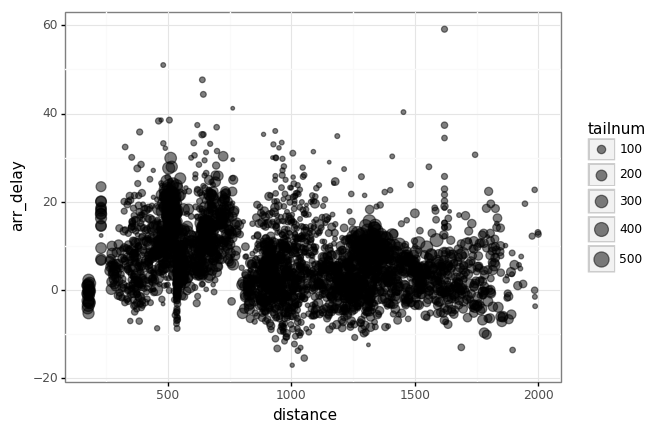

<ggplot: (154651184988)>

In [79]:
ggplot(delay, aes(x = 'distance', y = 'arr_delay')) +\
    geom_point(aes(size = 'tailnum'), alpha = 1/2) 

`ggplot2` alone is worth the effort to learn R!